<a href="https://colab.research.google.com/github/Sjinjutha/DADS7202-DL/blob/main/DADS7202_HW1_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [ ]:
n = df.shape[0]
m = df.shape[1]
print(n,m)

63326 11


In [ ]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [ ]:
print(f"Number of rows {n}")

Number of rows 62342


In [ ]:
# percent of missing "Gender" 
print('Percent of missing "Gender" records is %.2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

Percent of missing "Gender" records is 71.23%


In [ ]:
df = df.drop(['Gender'], axis = 1)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [ ]:
new_cols = ['Agency','Agency Type','Distribution Channel','Product Name','Duration','Destination','Net Sales','Commision (in value)','Age','Claim']
df = df.reindex(columns=new_cols)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,81,No
1,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,71,No
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65,AUSTRALIA,-49.5,29.70,32,No
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60,AUSTRALIA,-39.6,23.76,32,No
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79,ITALY,-19.8,11.88,41,No


In [ ]:
# Imbalanced Dataset

claim = pd.DataFrame(df.groupby(["Claim"]).size(), columns=['Frequency'])
claim['Percent'] = round((claim['Frequency'] / n)*100 , 2)
claim

,Frequency,Percent
Claim,,
No,62399,98.54
Yes,927,1.46


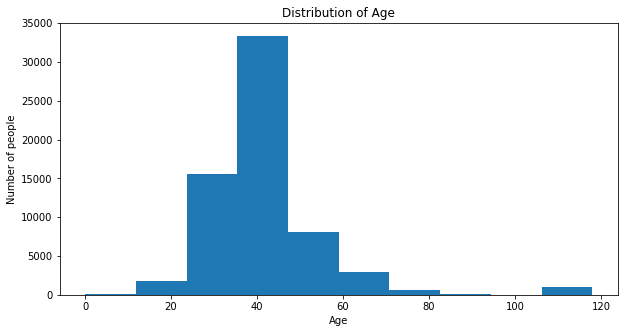

In [ ]:
figure_age = plt.figure(figsize = (10, 5))
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of Age")
plt.show()

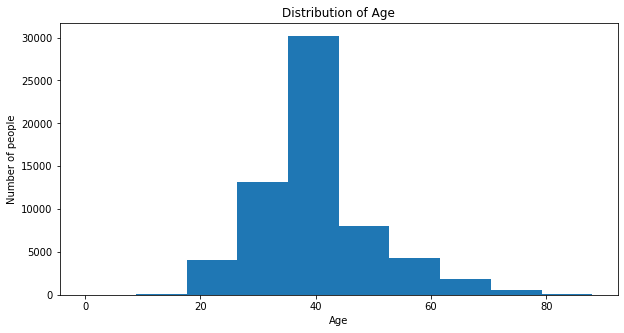

In [ ]:
df['Age'] = np.where(df['Age'] >= df['Age'].quantile(0.997), np.nan, df['Age'])
df = df.dropna()

figure_age = plt.figure(figsize = (10, 5))
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of Age")
plt.show()

In [ ]:
n = df.shape[0]
n

62342

In [ ]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Unique elements of',key,'are: ')
    print(df[key].unique(),end='\n')
    print(end='\n')

Unique elements of Agency are: 
['CBH' 'CWT' 'JZI' 'KML' 'EPX' 'C2B' 'RAB' 'SSI' 'ART' 'CSR' 'CCR' 'ADM'
 'LWC' 'TTW' 'TST']

Unique elements of Agency Type are: 
['Travel Agency' 'Airlines']

Unique elements of Distribution Channel are: 
['Offline' 'Online']

Unique elements of Product Name are: 
['Comprehensive Plan' 'Rental Vehicle Excess Insurance' 'Value Plan'
 'Basic Plan' 'Premier Plan' '2 way Comprehensive Plan' 'Bronze Plan'
 'Silver Plan' 'Annual Silver Plan' 'Cancellation Plan'
 '1 way Comprehensive Plan' 'Ticket Protector' '24 Protect' 'Gold Plan'
 'Annual Gold Plan' 'Single Trip Travel Protect Silver'
 'Individual Comprehensive Plan' 'Spouse or Parents Comprehensive Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Gold' 'Single Trip Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Child Comprehensive Plan'
 'Travel Cruise Protect' 'Travel Cruise Protect Family']

Unique elements of Destination are: 
['MALAYSIA' 'AUS

In [ ]:
# Imbalanced Dataset *******************

claim = pd.DataFrame(df.groupby(["Claim"]).size(), columns=['Frequency'])
claim['Percent'] = round((claim['Frequency'] / n)*100 , 2)
claim

,Frequency,Percent
Claim,,
No,61425,98.53
Yes,917,1.47


In [ ]:
df[df.Claim == 'Yes']

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
23,C2B,Airlines,Online,Bronze Plan,12,SINGAPORE,94.00,23.50,34.0,Yes
248,C2B,Airlines,Online,Silver Plan,10,SINGAPORE,43.55,10.89,45.0,Yes
313,EPX,Travel Agency,Online,Cancellation Plan,73,THAILAND,16.00,0.00,36.0,Yes
419,C2B,Airlines,Online,Silver Plan,11,SINGAPORE,62.25,15.56,33.0,Yes
424,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,187.85,46.96,32.0,Yes
...,...,...,...,...,...,...,...,...,...,...
63173,EPX,Travel Agency,Online,Cancellation Plan,32,VIET NAM,12.00,0.00,35.0,Yes
63199,C2B,Airlines,Online,Bronze Plan,7,SINGAPORE,20.00,5.00,30.0,Yes
63206,C2B,Airlines,Online,Bronze Plan,27,SINGAPORE,60.00,15.00,30.0,Yes
63208,C2B,Airlines,Online,Bronze Plan,12,SINGAPORE,21.00,5.25,28.0,Yes


In [ ]:
yes = df[df.Claim == 'Yes']
n_yes = yes.shape[0]

In [ ]:
AT = pd.DataFrame(df.groupby(["Agency Type", "Claim"]).size(), columns=['Frequency'])
AT['Percent'] = round((AT['Frequency'] / n)*100 , 2)
AT

Frequency  Percent
Agency Type   Claim                    
Airlines      No         15977    25.63
              Yes          586     0.94
Travel Agency No         45448    72.90
              Yes          331     0.53

In [ ]:
AT = pd.DataFrame(yes.groupby(["Agency Type"]).size(), columns=['Frequency'])
AT['Percent'] = round((AT['Frequency'] / n_yes)*100 , 2)
AT

,Frequency,Percent
Agency Type,,
Airlines,586,63.9
Travel Agency,331,36.1


In [ ]:
# Agency = Agency Type so delete Agency variable?

A = pd.DataFrame(df.groupby(["Agency","Agency Type", "Claim"]).size(), columns=['Frequency'])
A['Percent'] = round((A['Frequency'] / n)*100 , 2)
A

Frequency  Percent
Agency Agency Type   Claim                    
ADM    Travel Agency No            81     0.13
ART    Airlines      No           272     0.44
C2B    Airlines      No          7720    12.38
                     Yes          547     0.88
CBH    Travel Agency No           100     0.16
                     Yes            1     0.00
CCR    Travel Agency No           145     0.23
                     Yes            2     0.00
CSR    Travel Agency No            85     0.14
                     Yes            1     0.00
CWT    Travel Agency No          8492    13.62
                     Yes           86     0.14
EPX    Travel Agency No         34888    55.96
                     Yes          191     0.31
JZI    Airlines      No          6230     9.99
                     Yes           31     0.05
KML    Travel Agency No           384     0.62
                     Yes            8     0.01
LWC    Travel Agency No           653     1.05
                     Yes           36     0.06
RAB    Airlines      No           724     1.16
                     Yes            1     0.00
SSI    Airlines      No          1031     1.65
                     Yes            7     0.01
TST    Travel Agency No           526     0.84
                     Yes            2     0.00
TTW    Travel Agency No            94     0.15
                     Yes            4     0.01

In [ ]:
AG = pd.DataFrame(yes.groupby(["Agency"]).size(), columns=['Frequency'])
AG['Percent'] = round((AG['Frequency'] / yes.shape[0])*100 , 2)
AG.sort_values('Frequency', ascending=False)

,Frequency,Percent
Agency,,
C2B,547,59.65
EPX,191,20.83
CWT,86,9.38
LWC,36,3.93
JZI,31,3.38
KML,8,0.87
SSI,7,0.76
TTW,4,0.44
CCR,2,0.22


In [ ]:
DN = pd.DataFrame(yes.groupby(["Destination"]).size(), columns=['Frequency'])
DN['Percent'] = round((DN['Frequency'] / n_yes)*100 , 2)
DN.sort_values('Frequency', ascending=False).head(10)

## add variable Desination=Singapore or not?
## delete 

,Frequency,Percent
Destination,,
SINGAPORE,562,61.29
CHINA,44,4.80
UNITED STATES,37,4.03
AUSTRALIA,37,4.03
THAILAND,33,3.60
MALAYSIA,22,2.40
UNITED KINGDOM,16,1.74
"KOREA, REPUBLIC OF",15,1.64
HONG KONG,15,1.64


In [ ]:
CN = pd.DataFrame(df.groupby(["Distribution Channel", "Claim"]).size(), columns=['Frequency'])
CN['Percent'] = round((CN['Frequency'] / n)*100 , 2)
CN

Frequency  Percent
Distribution Channel Claim                    
Offline              No           992     1.59
                     Yes           12     0.02
Online               No         60433    96.94
                     Yes          905     1.45

In [ ]:
DC = pd.DataFrame(yes.groupby(["Distribution Channel"]).size(), columns=['Frequency'])
DC['Percent'] = round((DC['Frequency'] / n_yes)*100 , 2)
DC

,Frequency,Percent
Distribution Channel,,
Offline,12,1.31
Online,905,98.69


In [ ]:
PN = pd.DataFrame(df.groupby(["Product Name", "Claim"]).size(), columns=['Frequency'])
PN['Percent'] = round((PN['Frequency'] / n)*100 , 2)
PN

Frequency  Percent
Product Name                         Claim                    
1 way Comprehensive Plan             No          3320     5.33
                                     Yes            7     0.01
2 way Comprehensive Plan             No         12985    20.83
                                     Yes          140     0.22
24 Protect                           No           245     0.39
Annual Gold Plan                     No           173     0.28
                                     Yes           21     0.03
Annual Silver Plan                   No          1266     2.03
                                     Yes          157     0.25
Annual Travel Protect Gold           No            90     0.14
                                     Yes           10     0.02
Annual Travel Protect Platinum       No            50     0.08
                                     Yes            3     0.00
Annual Travel Protect Silver         No            82     0.13
                                     Yes            4     0.01
Basic Plan                           No          5395     8.65
                                     Yes           23     0.04
Bronze Plan                          No          3839     6.16
                                     Yes          210     0.34
Cancellation Plan                    No         18583    29.81
                                     Yes           44     0.07
Child Comprehensive Plan             No             9     0.01
Comprehensive Plan                   No           314     0.50
                                     Yes            4     0.01
Gold Plan                            No           334     0.54
                                     Yes           18     0.03
Individual Comprehensive Plan        No            71     0.11
                                     Yes            3     0.00
Premier Plan                         No           188     0.30
                                     Yes            3     0.00
Rental Vehicle Excess Insurance      No          8492    13.62
                                     Yes           86     0.14
Silver Plan                          No          2108     3.38
                                     Yes          141     0.23
Single Trip Travel Protect Gold      No           194     0.31
                                     Yes           10     0.02
Single Trip Travel Protect Platinum  No            68     0.11
                                     Yes            5     0.01
Single Trip Travel Protect Silver    No           169     0.27
                                     Yes            4     0.01
Spouse or Parents Comprehensive Plan No            14     0.02
                                     Yes            1     0.00
Ticket Protector                     No          1031     1.65
                                     Yes            7     0.01
Travel Cruise Protect                No           525     0.84
                                     Yes            2     0.00
Travel Cruise Protect Family         No             1     0.00
Value Plan                           No          1879     3.01
                                     Yes           14     0.02

In [ ]:
PN = pd.DataFrame(yes.groupby(["Product Name"]).size(), columns=['Frequency'])
PN['Percent'] = round((PN['Frequency'] / yes.shape[0])*100 , 2)
PN.sort_values('Frequency', ascending=False)

,Frequency,Percent
Product Name,,
Bronze Plan,210,22.90
Annual Silver Plan,157,17.12
Silver Plan,141,15.38
2 way Comprehensive Plan,140,15.27
Rental Vehicle Excess Insurance,86,9.38
Cancellation Plan,44,4.80
Basic Plan,23,2.51
Annual Gold Plan,21,2.29
Gold Plan,18,1.96


In [ ]:
# Agency Type : Airlines=1, TravelAgency:0
df["Agency Type"] = np.where((df["Agency Type"] == 'Airlines'), 1,0)

# Distribution Channel : Online=1, Offline=0
df["Distribution Channel"] = np.where((df["Distribution Channel"] == 'Online'), 1,0)

# Destination : Singapore=1, others:0
df["Des_Singapore"] = np.where((df["Destination"] == 'SINGAPORE'), 1,0)

# Target variable 'Claim' : Yes=1, No=0
df["Claim"] = np.where((df["Claim"] == 'Yes'), 1,0)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Des_Singapore
0,CBH,0,0,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,81.0,0,0
1,CBH,0,0,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,71.0,0,0
2,CWT,0,1,Rental Vehicle Excess Insurance,65,AUSTRALIA,-49.5,29.70,32.0,0,0
3,CWT,0,1,Rental Vehicle Excess Insurance,60,AUSTRALIA,-39.6,23.76,32.0,0,0
4,CWT,0,1,Rental Vehicle Excess Insurance,79,ITALY,-19.8,11.88,41.0,0,0
5,JZI,1,1,Value Plan,66,UNITED STATES,-121.0,42.35,44.0,0,0
6,CWT,0,1,Rental Vehicle Excess Insurance,47,UNITED STATES,-39.6,23.76,32.0,0,0
7,CWT,0,1,Rental Vehicle Excess Insurance,63,AUSTRALIA,-108.9,65.34,29.0,0,0
8,CWT,0,1,Rental Vehicle Excess Insurance,57,THAILAND,-19.8,11.88,44.0,0,0
9,CWT,0,1,Rental Vehicle Excess Insurance,186,AUSTRALIA,-99.0,59.40,37.0,0,0


In [ ]:
dm = pd.get_dummies(df, columns = ['Product Name','Destination'])
dm

"Y_train =pd.DataFrame(dm.loc[:,'Claim'], columns=['Claim'])\n\ndm.drop('Claim', axis=1, inplace=True)\nX_train = dm"

In [ ]:
dm.head()

,Agency,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Claim,Des_Singapore,Product Name_1 way Comprehensive Plan,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,CBH,0,0,186,-29.0,9.57,81.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CBH,0,0,186,-29.0,9.57,71.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CWT,0,1,65,-49.5,29.70,32.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CWT,0,1,60,-39.6,23.76,32.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CWT,0,1,79,-19.8,11.88,41.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dm.to_csv('data_travel_insurance.csv')
!cp data_travel_insurance.csv "/content/drive/MyDrive/"